In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [4]:
data = pd.read_csv('predictive_maintenance.csv')

In [12]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [16]:
#data.info()

In [17]:
X = data.drop(['UDI', 'Product ID', 'Target', 'Failure Type'], axis=1)
X = pd.get_dummies(X, columns=['Type'], drop_first=True)
y = data['Target']

print(f"Total samples: {len(data)}")
print(f"Number of features: {X.shape[1]}")
print(f"Healthy machines (0): {(y == 0).sum()}")  
print(f"Failed machines (1): {(y == 1).sum()}")
print(f"Failure percentage: {(y == 1).mean():.1%}")

Total samples: 10000
Number of features: 7
Healthy machines (0): 9661
Failed machines (1): 339
Failure percentage: 3.4%


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  
)

print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")
print(f"Failures in training: {y_train.sum()} ({(y_train == 1).mean():.1%})")

Training samples: 8000
Testing samples: 2000
Failures in training: 271 (3.4%)


In [22]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


In [23]:
print(f"Before SMOTE - Training data:")
print(f"  Healthy: {(y_train == 0).sum()}")
print(f"  Failed: {(y_train == 1).sum()}")

print(f"After SMOTE - Training data:")
print(f"  Healthy: {(y_train_balanced == 0).sum()}")  
print(f"  Failed: {(y_train_balanced == 1).sum()}")

Before SMOTE - Training data:
  Healthy: 7729
  Failed: 271
After SMOTE - Training data:
  Healthy: 7729
  Failed: 7729


In [26]:
model = RandomForestClassifier(
    random_state=42,
    n_estimators=100 
)
model.fit(X_train_balanced, y_train_balanced)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False



CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1932
           1       0.47      0.72      0.57        68

    accuracy                           0.96      2000
   macro avg       0.73      0.85      0.77      2000
weighted avg       0.97      0.96      0.97      2000


CONFUSION MATRIX:


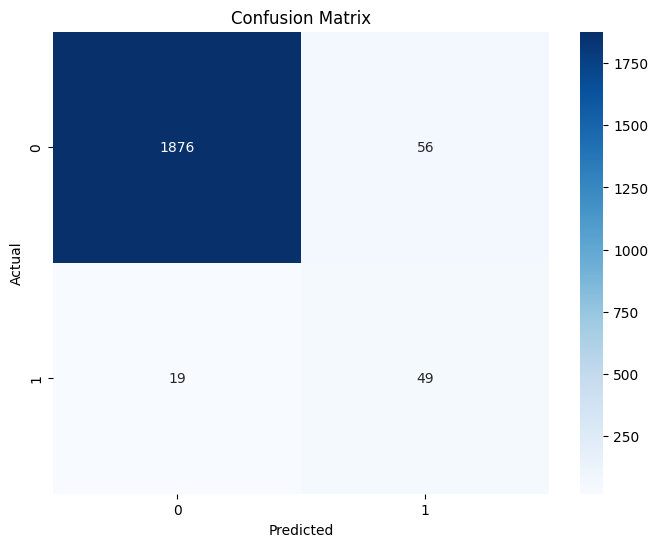


THE MOST IMPORTANT NUMBER:
FAILURE RECALL: 72.1%
(This means 72.1% of actual failures!)


In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

print("\n" + "="*50)
print("CLASSIFICATION REPORT:")
print("="*50)
print(classification_report(y_test, y_pred))

print("\n" + "="*50)
print("CONFUSION MATRIX:")
print("="*50)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

from sklearn.metrics import recall_score
failure_recall = recall_score(y_test, y_pred, pos_label=1)
print(f"\nTHE MOST IMPORTANT NUMBER:")
print(f"FAILURE RECALL: {failure_recall:.1%}")
print(f"(This means {failure_recall:.1%} of actual failures!)")